## **DEMANDA Y TEMPERATURA:** VISIÓN GENERAL

#### **1) Importamos libreria útiles:**


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
maxScatter = 3000

#### **2) Cargamos datos:**

- Comprobamos que trabajamos en el directorio correcto y cargamos datos de carpeta "data":

In [3]:
dir = os.getcwd()
DIR = dir
print('Current working directory:', os.getcwd())


# Nos guardamos los datos que queremos en un dataframe usando pandas
dataframe = pd.read_csv('..\data\DATOS_PIB_INE.csv', sep=';', verbose=True)
dataframe['VALOR'] = dataframe['VALOR'].apply(lambda x: float(x.replace(',','.')))
dataframe = dataframe.iloc[::-1]
dataframe

Current working directory: c:\Users\serov\Documents\GitHub\TRABAJO-1-ESTADISTICA-DESCRIPTIVA\notebooks
Tokenization took: 0.00 ms
Type conversion took: 4.00 ms
Parser memory cleanup took: 0.00 ms


,PERIODO,VALOR,TIPO DATO,ANNO
31,2014T1,0.3673,Definitivo,2014
30,2014T2,0.4635,Definitivo,2014
29,2014T3,0.7401,Definitivo,2014
28,2014T4,0.8583,Definitivo,2014
27,2015T1,1.1474,Definitivo,2015
26,2015T2,1.0730,Definitivo,2015
25,2015T3,0.9100,Definitivo,2015
24,2015T4,0.9688,Definitivo,2015
23,2016T1,0.6778,Definitivo,2016
22,2016T2,0.4196,Definitivo,2016


In [4]:
print(dataframe.dtypes)

PERIODO       object
VALOR        float64
TIPO DATO     object
ANNO           int64
dtype: object


- Demanda a lo largo de todos los años:

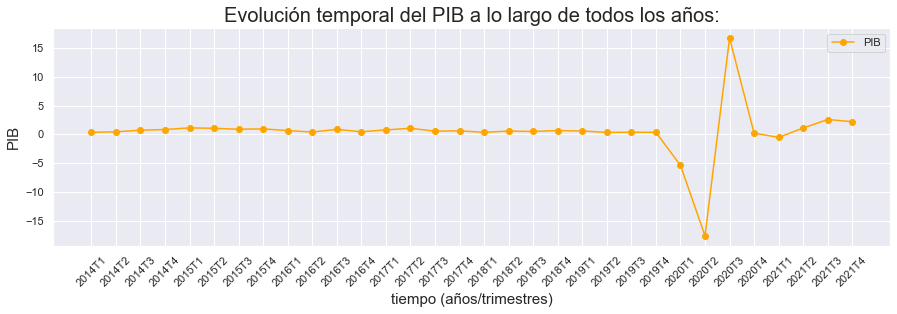

In [5]:
fig = plt.figure(5, figsize=(15, 4)) 

plt.plot(dataframe['PERIODO'], dataframe['VALOR'], label = 'PIB', color = 'orange', marker = 'o')

plt.title("Evolución temporal del PIB a lo largo de todos los años:", fontsize = 20)
plt.xticks(rotation=45)
plt.xlabel("tiempo (años/trimestres)", fontsize = 15)
plt.ylabel("PIB", fontsize = 15)
plt.legend()
plt.savefig('../reports/figures/Evolución temporal del PIB a lo largo de todos los años.png', bbox_inches='tight')
plt.show()

In [6]:
dataframe_DEM = pd.read_csv('..\data\G02_DATOS_DEM_G1.csv', sep=',', verbose=True)

dataframe_temp = pd.DataFrame()
dataframe_temp['DEM'] = dataframe_DEM.groupby(['ANNO'])[['DEM']].mean()['DEM']
dataframe_temp['VALOR'] = dataframe.groupby(['ANNO']).mean()['VALOR']

# Eliminamos el año 2022
dataframe_temp = dataframe_temp[:-1]

Tokenization took: 0.99 ms
Type conversion took: 2.00 ms
Parser memory cleanup took: 0.00 ms


In [17]:
dataframe_temp[:5]

,DEM,VALOR
ANNO,,
2014,683.403123,0.607300
2015,697.432822,1.024800
2016,715.430820,0.612200
2017,753.882603,0.767700
2018,787.730084,0.539075


In [18]:
dataframe_temp[5:]

,DEM,VALOR
ANNO,,
2019,785.679061,0.430625
2020,740.748907,-1.505550
2021,789.155768,1.363425


C:\Users\serov\AppData\Local\Temp\ipykernel_26420\1371564632.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(im1, cax=cax, orientation='vertical')
C:\Users\serov\AppData\Local\Temp\ipykernel_26420\1371564632.py:29: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(im2, cax=cax, orientation='vertical')


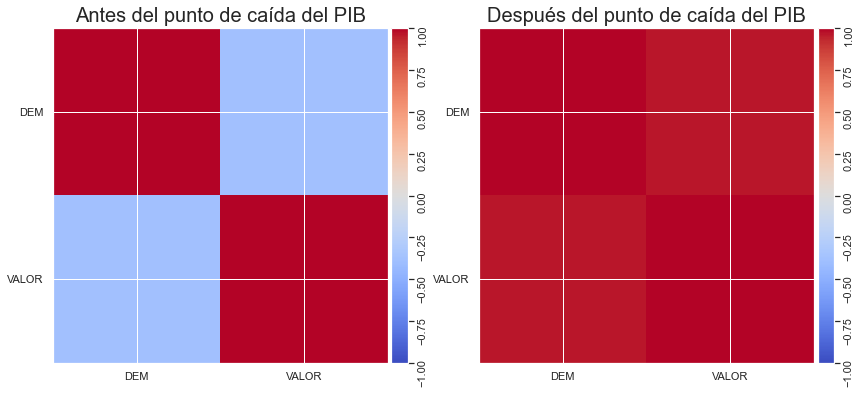

            DEM     VALOR
DEM    1.000000 -0.375958
VALOR -0.375958  1.000000
            DEM     VALOR
DEM    1.000000  0.966408
VALOR  0.966408  1.000000


In [19]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Calculamos la matriz de correlación:
corr_pre = dataframe_temp[:5].corr()
corr_pos = dataframe_temp[5:].corr()

# Gráficamente
fig = plt.figure(figsize=(14, 12))

ax1 = fig.add_subplot(121)
im1 = ax1.imshow(corr_pre, cmap='coolwarm', vmin=-1, vmax=1)

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

ticks = np.arange(0,len(dataframe_temp[:4].columns),1)
ax1.set_xticks(ticks)
plt.yticks(rotation=90)
ax1.set_yticks(ticks)
ax1.set_xticklabels(dataframe_temp[:4].columns)
ax1.set_yticklabels(dataframe_temp[:4].columns)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(corr_pos, cmap='coolwarm', vmin=-1, vmax=1)

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

ticks = np.arange(0,len(dataframe_temp[4:].columns),1)
ax2.set_xticks(ticks)
plt.yticks(rotation=90)
ax2.set_yticks(ticks)
ax2.set_xticklabels(dataframe_temp[4:].columns)
ax2.set_yticklabels(dataframe_temp[4:].columns)

ax1.set_title('Antes del punto de caída del PIB', fontsize = 20)
ax2.set_title('Después del punto de caída del PIB', fontsize = 20)

plt.savefig('../reports/figures/Correlación entre variables (PIB).png', bbox_inches='tight')
plt.show()

# Numéricamente
print(corr_pre)
print(corr_pos)